<a href="https://colab.research.google.com/github/MasBarr/Barrett2024/blob/main/BarrettFig2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pingouin

Excel file loaded successfully from GitHub!
Data from Sheet1 and Sheet2 loaded successfully.


<ipython-input-2-495829558279>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet1_data.loc[:, 'Gender'] = sheet1_data['mouse'].apply(lambda x: 'Male' if x.startswith('M') else 'Female')
<ipython-input-2-495829558279>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sheet2_data.loc[:, 'Gender2'] = sheet2_data['Mouse2'].apply(lambda x: 'Male' if x.startswith('M') else 'Female')


ANOVA FOR BAR PLOT
  Source          SS  DF         MS          F         p-unc     p-GG-corr  \
0  Diet2  112.300278   2  56.150139  85.912968  4.028271e-11  3.325558e-08   
1  Error   14.378540  22   0.653570        NaN           NaN           NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.841587  0.681549      False  0.532754  0.042918  
1       NaN       NaN        NaN       NaN       NaN  
  Contrast         A         B  Paired  Parametric          T   dof  \
0    Diet2    FR1HFD  FreeChow    True        True  -3.911784  11.0   
1    Diet2    FR1HFD   FreeHFD    True        True  -9.788224  11.0   
2    Diet2  FreeChow   FreeHFD    True        True -12.301588  11.0   

  alternative         p-unc        p-corr    p-adjust       BF10    hedges  
0   two-sided  2.426876e-03  7.280627e-03  bonferroni      19.01 -1.519074  
1   two-sided  9.152297e-07  2.745689e-06  bonferroni  1.795e+04 -4.588795  
2   two-sided  9.009560e-08  2.702868e-07  bonferroni  1.426e+05 

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,day,5,10,True,True,-9.900193,11.0,two-sided,8.171691e-07,0.000012,bonferroni,1.986e+04,-1.654253
1,day,5,15,True,True,-4.450668,11.0,two-sided,9.776149e-04,0.014664,bonferroni,40.84,-0.851582
2,day,5,20,True,True,-6.996386,11.0,two-sided,2.280328e-05,0.000342,bonferroni,1046.391,-1.856719
3,day,5,25,True,True,-6.251258,11.0,two-sided,6.249243e-05,0.000937,bonferroni,433.844,-1.705730
4,day,5,30,True,True,-9.372748,11.0,two-sided,1.406793e-06,0.000021,bonferroni,1.225e+04,-2.641863
5,day,10,15,True,True,6.953707,11.0,two-sided,2.411249e-05,0.000362,bonferroni,996.441,0.668378
6,day,10,20,True,True,-3.816552,11.0,two-sided,2.860151e-03,0.042902,bonferroni,16.576,-0.552295
7,day,10,25,True,True,-2.000430,11.0,two-sided,7.075176e-02,1.000000,bonferroni,1.276,-0.345385
8,day,10,30,True,True,-7.086000,11.0,two-sided,2.029597e-05,0.000304,bonferroni,1158.888,-1.301835
9,day,15,20,True,True,-8.192791,11.0,two-sided,5.204952e-06,0.000078,bonferroni,3840.605,-1.079429


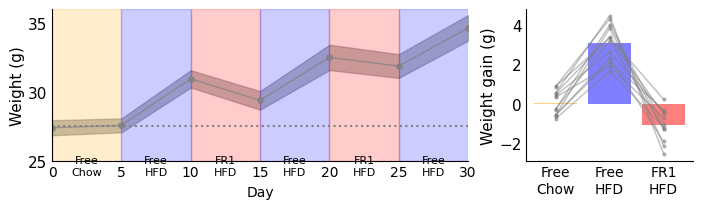

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from io import BytesIO

def load_excel_from_github(username, repo, branch, folder, file_name):
    # Construct the raw file URL to download the Excel file
    file_url = f"https://raw.githubusercontent.com/{username}/{repo}/{branch}/{folder}/{file_name}"
    file_response = requests.get(file_url)

    if file_response.status_code == 200:
        # Load the Excel data directly from the response content
        sheets = pd.read_excel(BytesIO(file_response.content), sheet_name=None)
        print("Excel file loaded successfully from GitHub!")
        return sheets
    else:
        print(f"Failed to download the file: {file_response.status_code}")
        return None

# GitHub details
username = "MasBarr"  # Replace with the actual GitHub username or organization
repo = "Barrett2024"  # Repository name
branch = "main"       # Branch name
folder = "Data/Fig2"  # Folder path within the repository
file_name = "CleanedSwapCastle (1).xlsx"  # Excel file name

# Load the Excel file
sheets = load_excel_from_github(username, repo, branch, folder, file_name)

# Ensure that sheets is not None before proceeding
if sheets is not None:
    # Access each sheet
    sheet1_data = sheets['Sheet1']
    sheet2_data = sheets['Sheet2']

    print("Data from Sheet1 and Sheet2 loaded successfully.")
else:
    print("Data loading failed. Check the GitHub URL or repository structure.")

# Exclude the data for specific mice from Sheet1
excluded_mice = ['M2', 'F2', 'F10']
sheet1_data = sheet1_data[~sheet1_data['mouse'].isin(excluded_mice)]
sheet2_data = sheet2_data[~sheet2_data['Mouse2'].isin(excluded_mice)]

# Use .loc to avoid SettingWithCopyWarning
sheet1_data.loc[:, 'Gender'] = sheet1_data['mouse'].apply(lambda x: 'Male' if x.startswith('M') else 'Female')

# Continue with the analysis using Sheet2 for weight gain and calories
average_data_per_mouse = sheet2_data.groupby(['Mouse2', 'Diet2']).agg({'weightgainavg': 'mean', 'Cal Avg': 'mean'}).reset_index()

# Group the data by diet and calculate the average weight gain and calories per diet
average_weight_gain_per_diet = average_data_per_mouse.groupby('Diet2')['weightgainavg'].mean().reset_index()
average_calories_per_diet = average_data_per_mouse.groupby('Diet2')['Cal Avg'].mean().reset_index()

# Filter out 'Baseline' from the diet
average_weight_gain_per_diet = average_weight_gain_per_diet[average_weight_gain_per_diet['Diet2'] != 'Baseline']
average_calories_per_diet = average_calories_per_diet[average_calories_per_diet['Diet2'] != 'Baseline']

# Define the desired order for the diets
desired_order = ['FreeChow', 'FreeHFD', 'FR1HFD']
average_weight_gain_per_diet['Diet2'] = pd.Categorical(average_weight_gain_per_diet['Diet2'], categories=desired_order, ordered=True)
average_weight_gain_per_diet = average_weight_gain_per_diet.sort_values('Diet2')

average_calories_per_diet['Diet2'] = pd.Categorical(average_calories_per_diet['Diet2'], categories=desired_order, ordered=True)
average_calories_per_diet = average_calories_per_diet.sort_values('Diet2')

# Define font sizes
font_sizes = {
    'title': 10,
    'xlabel': 10,
    'ylabel': 11,
    'xticks': 10,
    'yticks': 11,
    'legend': 8,
    'inset_title': 10,
    'inset_ylabel': 10
}

# Ensure that matplotlib uses DejaVu Sans font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert figure size from mm to inches
fig_width_in = 210 / 25.4  # Split the total width between the two figures
fig_height_in = 50 / 25.4

# Define the day ranges and corresponding phases
day_ranges = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]
phases = ['Free\nChow', 'Free\nHFD', 'FR1\nHFD', 'Free\nHFD', 'FR1\nHFD', 'Free\nHFD']

# Create a Gender column in sheet1_data based on the 'mouse' column
sheet1_data.loc[:, 'Gender'] = sheet1_data['mouse'].apply(lambda x: 'Male' if x.startswith('M') else 'Female')

# Create a Gender2 column in sheet2_data based on the 'Mouse2' column
sheet2_data.loc[:, 'Gender2'] = sheet2_data['Mouse2'].apply(lambda x: 'Male' if x.startswith('M') else 'Female')

# Now we group the data by the new Gender2 column and Diet2
average_data_per_gender_diet = sheet2_data.groupby(['Gender2', 'Diet2']).agg({
    'weightgainavg': 'mean',
    'Cal Avg': 'mean'
}).reset_index()

# Filter out 'Baseline' from the diet
average_data_per_gender_diet = average_data_per_gender_diet[average_data_per_gender_diet['Diet2'] != 'Baseline']

# Define the desired order for the diets
desired_order = ['FreeChow', 'FreeHFD', 'FR1HFD']
average_data_per_gender_diet['Diet2'] = pd.Categorical(average_data_per_gender_diet['Diet2'], categories=desired_order, ordered=True)
average_data_per_gender_diet = average_data_per_gender_diet.sort_values('Diet2')

# Set the color palette for the tasks
palette = {
    'Free with Chow': 'orange',
    'Free with HFD': 'blue',
    'FR1 with HFD': 'red'
}
barpalette = {
    'FreeChow': 'orange',
    'FreeHFD': 'blue',
    'FR1HFD': 'red'
}

# Now, separate the data for females and males based on Gender2
female_data_per_gender_diet = average_data_per_gender_diet[average_data_per_gender_diet['Gender2'] == 'Female']
male_data_per_gender_diet = average_data_per_gender_diet[average_data_per_gender_diet['Gender2'] == 'Male']

# Separate the data by gender in sheet1_data
male_data = sheet1_data[sheet1_data['mouse'].str.startswith('M')]
female_data = sheet1_data[sheet1_data['mouse'].str.startswith('F')]

# Separate the data by gender in sheet2_data using the new Gender2 column
male_data2 = sheet2_data[sheet2_data['Gender2'] == 'Male']
female_data2 = sheet2_data[sheet2_data['Gender2'] == 'Female']

# Calculate average weight per day for males
average_weight_per_day_male = male_data.groupby('day')['weight'].mean().reset_index()

# Calculate the standard error of the mean (SEM) for each specified day for males
sem_weight_percentage_male = male_data.groupby('day')['weight'].sem().reset_index()

# Function to plot the figure for males
def plot_male_figure(fig_width=fig_width_in, fig_height=fig_height_in, labelpad=2):
    fig = plt.figure(figsize=(fig_width, fig_height))

    gs = GridSpec(1, 2, width_ratios=[5, 2], wspace=0.2)

  # Plot the average weight across each day for males
    ax0 = fig.add_subplot(gs[0])
    ax0.plot(average_weight_per_day_male['day'], average_weight_per_day_male['weight'], marker='o', color='grey', linewidth=1, linestyle='-', markersize=4, alpha=0.7)
    ax0.fill_between(average_weight_per_day_male['day'],
                     average_weight_per_day_male['weight'] - sem_weight_percentage_male['weight'],
                     average_weight_per_day_male['weight'] + sem_weight_percentage_male['weight'],
                     color='grey', alpha=0.5)

    # Add transparent rectangles for each phase
    for i, (start, end) in enumerate(day_ranges):
        phase = phases[i].replace('\n', '')
        ax0.axvspan(start, end, color=barpalette[phase], alpha=0.2)
        mid_point = (start + end) / 2
        ax0.text(mid_point, (min(average_weight_per_day_male['weight']) - 2), phases[i],
                 color='black', fontsize=8, ha='center', va='top', rotation=0)

    ax0.set_xlabel('Day', fontsize=font_sizes['xlabel'])
    ax0.set_ylabel('Weight (g)', fontsize=font_sizes['ylabel'], labelpad=labelpad)
    ax0.set_ylim(25, 36)
    ax0.set_yticks([25, 30, 35])
    ax0.tick_params(axis='x', labelsize=font_sizes['xticks'])
    ax0.set_xlim(0, 30)
    ax0.tick_params(axis='x', labelsize=font_sizes['xticks'], length=0)
    ax0.tick_params(axis='y', labelsize=font_sizes['yticks'], length=0)
    ax0.axhline(27.5, color='grey', linestyle='dotted')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)

    # Filter the data to include only males for the barplot
    male_data_per_gender_diet = average_data_per_gender_diet[average_data_per_gender_diet['Gender2'] == 'Male']

    # Plot the bar graph for average weight gain per diet with points and lines using the new columns
    ax1 = fig.add_subplot(gs[1])
    ax1.bar(male_data_per_gender_diet['Diet2'], male_data_per_gender_diet['weightgainavg'], color=[barpalette[diet] for diet in male_data_per_gender_diet['Diet2']], alpha=0.5)

    # Replace 'data' with 'sheet2_data' to reference the correct DataFrame
    for mouse in sheet2_data['Mouse2'].unique():
        mouse_data = male_data2[male_data2['Mouse2'] == mouse]
        mouse_diets = mouse_data['Diet2'].values
        mouse_weight_gain = mouse_data['weightgainavg'].values
        ax1.plot(mouse_diets, mouse_weight_gain, 'o-', color='grey', alpha=0.5, markersize=2, linewidth=1)

    ax1.set_title('', fontsize=font_sizes['title'])
    ax1.set_xticks([0, 1, 2])  # Adjust tick positions based on your data
    ax1.set_xticklabels(["Free\nChow", "Free\nHFD", "FR1\nHFD"])
    ax1.set_ylabel('Weight gain (g)', fontsize=font_sizes['ylabel'], labelpad=labelpad)
    ax1.set_yticks([-2, 0, 2, 4])
    ax1.tick_params(axis='x', labelsize=font_sizes['xticks'], length=0)  # Removing x-ticks
    ax1.tick_params(axis='y', labelsize=font_sizes['yticks'], length=0)  # Removing y-ticks but keeping the numbers
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    plt.savefig("Fig.5AB.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

# Call the function to plot the male figure
plot_male_figure()

aov = pg.rm_anova(dv='weightgainavg', within='Diet2', subject='Mouse2', data=male_data2, detailed=True)
print("\033[1m" + "ANOVA FOR BAR PLOT" + "\033[0m")
print(aov)

# Post-hoc pairwise comparisons for 'Diet2'
post_hoc = pg.pairwise_tests(dv='weightgainavg', within='Diet2', subject='Mouse2', data=male_data2, padjust='bonferroni')

# Print post-hoc results
print(post_hoc)

male_data = male_data[male_data['Diet'] != 'Baseline']

# Run a repeated measures ANOVA
aov = pg.rm_anova(dv='weight', within=['day'], subject='mouse', data=male_data, detailed=True)

# Print the results
print("\033[1m" + "ANOVA FOR LINE PLOT" + "\033[0m")
print(aov)

# Run post-hoc pairwise comparisons (Tukey's HSD equivalent for repeated measures)
posthoc = pg.pairwise_tests(dv='weight', within='day', subject='mouse', data=male_data, padjust='bonferroni')

# Print post-hoc results
print("\033[1m" + "POST-HOC TEST RESULTS" + "\033[0m")
posthoc


<ipython-input-3-6baed148d1a9>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)


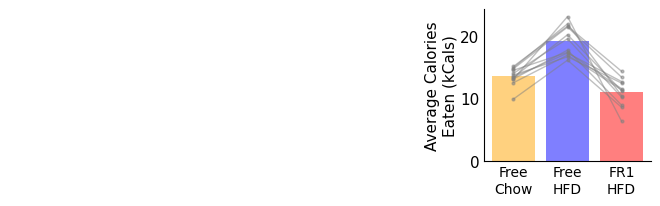

  Source          SS  DF          MS          F         p-unc     p-GG-corr  \
0  Diet2  421.760089   2  210.880044  65.058461  5.790241e-10  9.773911e-07   
1  Error   71.310647  22    3.241393        NaN           NaN           NaN   

       ng2       eps sphericity   W-spher   p-spher  
0  0.74831  0.597806      False  0.327216  0.003751  
1      NaN       NaN        NaN       NaN       NaN  
  Contrast         A         B  Paired  Parametric         T   dof  \
0    Diet2    FR1HFD  FreeChow    True        True -4.741715  11.0   
1    Diet2    FR1HFD   FreeHFD    True        True -8.270728  11.0   
2    Diet2  FreeChow   FreeHFD    True        True -9.602321  11.0   

  alternative     p-unc    p-corr    p-adjust       BF10    hedges  
0   two-sided  0.000608  0.001823  bonferroni     61.142 -1.329073  
1   two-sided  0.000005  0.000014  bonferroni    4161.19 -3.389368  
2   two-sided  0.000001  0.000003  bonferroni  1.515e+04 -2.735675  


/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [3]:
# Define font sizes
font_sizes = {
    'title': 10,
    'xlabel': 10,
    'ylabel': 11,
    'xticks': 10,
    'yticks': 11,
    'legend': 8,
    'inset_title': 10,
    'inset_ylabel': 10
}

# Ensure that matplotlib uses DejaVu Sans font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert figure size from mm to inches (210 mm x 50 mm)
fig_width_in = 210 / 25.4  # Total width (8.27 inches)
fig_height_in = 50 / 25.4  # Total height (1.97 inches)

# Create figure using GridSpec with a 5:2 ratio
fig = plt.figure(figsize=(fig_width_in, fig_height_in))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 2], wspace=0.2)

# Create ax0 (blank)
ax0 = fig.add_subplot(gs[0])
ax0.axis('off')  # Make ax0 blank by turning off the axis

# Filter average data for males
male_data = average_data_per_gender_diet[average_data_per_gender_diet['Gender2'] == 'Male']

# Create ax1 (the bar plot)
ax1 = fig.add_subplot(gs[1])
ax1.bar(male_data['Diet2'], male_data['Cal Avg'],
        color=[barpalette[diet] for diet in male_data['Diet2']], alpha=0.5)

# Plot individual points for each male mouse, with grey lines and dots
for mouse in male_data2['Mouse2'].unique():
    mouse_data = male_data2[male_data2['Mouse2'] == mouse]
    mouse_diets = mouse_data['Diet2'].values
    mouse_calories = mouse_data['Cal Avg'].values
    ax1.plot(mouse_diets, mouse_calories, 'o-', color='grey', alpha=0.5, markersize=2, linewidth=1)

# Set y-axis label for ax1
ax1.set_ylabel('Average Calories\nEaten (kCals)', fontsize=font_sizes['ylabel'], labelpad=2)
ax1.set_yticks([0, 10, 20])
ax1.tick_params(axis='x', labelsize=font_sizes['xticks'], length=0)
ax1.tick_params(axis='y', labelsize=font_sizes['yticks'], length=0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Customize the x-axis labels
ax1.set_xticks([0, 1, 2])  # Adjust tick positions based on your data
ax1.set_xticklabels(["Free\nChow", "Free\nHFD", "FR1\nHFD"])

# Adjust layout and save the figure
plt.tight_layout(pad=0)
plt.savefig(f"Fig_S5C_Male.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

# Run the repeated measures ANOVA
aov = pg.rm_anova(dv='Cal Avg', within='Diet2', subject='Mouse2', data=male_data2, detailed=True)

# Display the ANOVA results
print(aov)

# Perform post hoc pairwise comparisons between the diets
posthoc = pg.pairwise_ttests(dv='Cal Avg', within='Diet2', subject='Mouse2', data=male_data2, padjust='bonferroni')

# Display the post hoc results
print(posthoc)

ANOVA FOR BAR PLOT
  Source         SS  DF        MS          F     p-unc      ng2       eps
0  Diet2  12.883688   2  6.441844  12.631644  0.000733  0.62219  0.738224
1  Error   7.139673  14  0.509977        NaN       NaN      NaN       NaN
  Contrast         A         B  Paired  Parametric         T  dof alternative  \
0    Diet2    FR1HFD  FreeChow    True        True  2.281323  7.0   two-sided   
1    Diet2    FR1HFD   FreeHFD    True        True -3.224855  7.0   two-sided   
2    Diet2  FreeChow   FreeHFD    True        True -4.071651  7.0   two-sided   

      p-unc    p-corr    p-adjust    BF10    hedges  
0  0.056526  0.169578  bonferroni   1.733  1.030429  
1  0.014555  0.043665  bonferroni   4.871 -1.887862  
2  0.004739  0.014218  bonferroni  11.784 -2.333724  
ANOVA FOR LINE PLOT
  Source          SS  DF         MS          F         p-unc       ng2  \
0    day  162.507435   5  32.501487  44.694574  3.165301e-14  0.653153   
1  Error   25.451681  35   0.727191        NaN    

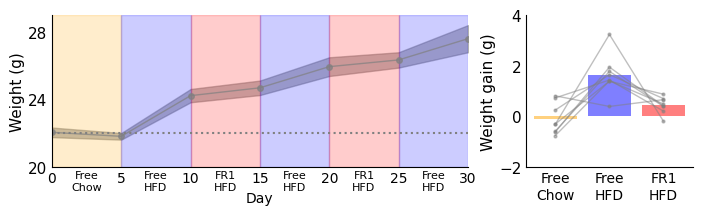

In [4]:
# Convert figure size from mm to inches
fig_width_in = 210 / 25.4  # Split the total width between the two figures
fig_height_in = 50 / 25.4

# Calculate average weight per day for females
average_weight_per_day_female = female_data.groupby('day')['weight'].mean().reset_index()

# Calculate the standard error of the mean (SEM) for each specified day for females
sem_weight_percentage_female = female_data.groupby('day')['weight'].sem().reset_index()

def plot_female_figure(fig_width=fig_width_in, fig_height=fig_height_in, labelpad=2):
    fig = plt.figure(figsize=(fig_width, fig_height))

    gs = GridSpec(1, 2, width_ratios=[5, 2], wspace=0.2)

    # Plot the average weight across each day for females
    ax0 = fig.add_subplot(gs[0])
    ax0.plot(average_weight_per_day_female['day'], average_weight_per_day_female['weight'], marker='o', color='grey', linewidth=1, linestyle='-', markersize=4, alpha=0.7)
    ax0.fill_between(average_weight_per_day_female['day'],
                     average_weight_per_day_female['weight'] - sem_weight_percentage_female['weight'],
                     average_weight_per_day_female['weight'] + sem_weight_percentage_female['weight'],
                     color='grey', alpha=0.5)

    # Add transparent rectangles for each phase
    for i, (start, end) in enumerate(day_ranges):
        phase = phases[i].replace('\n', '')
        ax0.axvspan(start, end, color=barpalette[phase], alpha=0.2)
        mid_point = (start + end) / 2
        ax0.text(mid_point, (min(average_weight_per_day_female['weight']) - 2), phases[i],
                 color='black', fontsize=8, ha='center', va='top', rotation=0)

    ax0.set_xlabel('Day', fontsize=font_sizes['xlabel'])
    ax0.set_ylabel('Weight (g)', fontsize=font_sizes['ylabel'], labelpad=labelpad)
    ax0.set_ylim(20, 29)
    ax0.set_yticks([20, 24, 28])
    ax0.tick_params(axis='x', labelsize=font_sizes['xticks'])
    ax0.set_xlim(0, 30)
    ax0.tick_params(axis='x', labelsize=font_sizes['xticks'], length=0)
    ax0.tick_params(axis='y', labelsize=font_sizes['yticks'], length=0)
    ax0.axhline(22, color='grey', linestyle='dotted')
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)

    # Filter the data to include only females for the barplot
    female_data_per_gender_diet = average_data_per_gender_diet[average_data_per_gender_diet['Gender2'] == 'Female']

    # Plot the bar graph for average weight gain per diet with points and lines using the new columns
    ax1 = fig.add_subplot(gs[1])
    ax1.bar(female_data_per_gender_diet['Diet2'], female_data_per_gender_diet['weightgainavg'], color=[barpalette[diet] for diet in female_data_per_gender_diet['Diet2']], alpha=0.5)

    # Replace 'data' with 'sheet2_data' to reference the correct DataFrame
    for mouse in sheet2_data['Mouse2'].unique():
        mouse_data = female_data2[female_data2['Mouse2'] == mouse]
        mouse_diets = mouse_data['Diet2'].values
        mouse_weight_gain = mouse_data['weightgainavg'].values
        ax1.plot(mouse_diets, mouse_weight_gain, 'o-', color='grey', alpha=0.5, markersize=2, linewidth=1)

    ax1.set_title('', fontsize=font_sizes['title'])
    ax1.set_xticks([0, 1, 2])  # Adjust tick positions based on your data
    ax1.set_xticklabels(["Free\nChow", "Free\nHFD", "FR1\nHFD"])
    ax1.set_ylabel('Weight gain (g)', fontsize=font_sizes['ylabel'], labelpad=labelpad)
    ax1.set_yticks([-2, 0, 2, 4])
    ax1.tick_params(axis='x', labelsize=font_sizes['xticks'], length=0)  # Removing x-ticks
    ax1.tick_params(axis='y', labelsize=font_sizes['yticks'], length=0)  # Removing y-ticks but keeping the numbers
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    plt.savefig("Fig.S5AB.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

# Call the function to plot the figure
plot_female_figure()

aov = pg.rm_anova(dv='weightgainavg', within='Diet2', subject='Mouse2', data=female_data2, detailed=True)
print("\033[1m" + "ANOVA FOR BAR PLOT" + "\033[0m")
print(aov)

# Post-hoc pairwise comparisons for 'Diet2'
post_hoc = pg.pairwise_tests(dv='weightgainavg', within='Diet2', subject='Mouse2', data=female_data2, padjust='bonferroni')

# Print post-hoc results
print(post_hoc)

female_data = female_data[female_data['Diet'] != 'Baseline']

# Run a repeated measures ANOVA
aov = pg.rm_anova(dv='weight', within=['day'], subject='mouse', data=female_data, detailed=True)

# Print the results
print("\033[1m" + "ANOVA FOR LINE PLOT" + "\033[0m")
print(aov)

# Run post-hoc pairwise comparisons (Tukey's HSD equivalent for repeated measures)
posthoc = pg.pairwise_tests(dv='weight', within='day', subject='mouse', data=female_data, padjust='bonferroni')

# Print post-hoc results
print("\033[1m" + "POST-HOC TEST RESULTS" + "\033[0m")
print(posthoc)

<ipython-input-5-81519dc79480>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0)


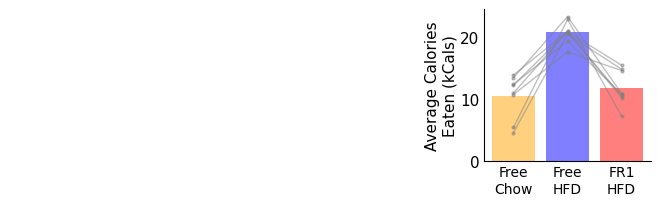

  Source          SS  DF          MS          F     p-unc       ng2       eps
0  Diet2  508.122570   2  254.061285  27.996984  0.000013  0.750494  0.988608
1  Error  127.044325  14    9.074595        NaN       NaN       NaN       NaN
  Contrast         A         B  Paired  Parametric         T  dof alternative  \
0    Diet2    FR1HFD  FreeChow    True        True  0.862641  7.0   two-sided   
1    Diet2    FR1HFD   FreeHFD    True        True -6.122231  7.0   two-sided   
2    Diet2  FreeChow   FreeHFD    True        True -7.105371  7.0   two-sided   

      p-unc    p-corr    p-adjust     BF10    hedges  
0  0.416907  1.000000  bonferroni    0.454  0.400510  
1  0.000480  0.001441  bonferroni   74.998 -3.549723  
2  0.000193  0.000578  bonferroni  159.054 -3.474650  


/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [5]:
# Define font sizes
font_sizes = {
    'title': 10,
    'xlabel': 10,
    'ylabel': 11,
    'xticks': 10,
    'yticks': 11,
    'legend': 8,
    'inset_title': 10,
    'inset_ylabel': 10
}

# Ensure that matplotlib uses DejaVu Sans font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert figure size from mm to inches (210 mm x 50 mm)
fig_width_in = 210 / 25.4  # Total width (8.27 inches)
fig_height_in = 50 / 25.4  # Total height (1.97 inches)

# Create figure using GridSpec with a 5:2 ratio
fig = plt.figure(figsize=(fig_width_in, fig_height_in))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 2], wspace=0.2)

# Create ax0 (blank)
ax0 = fig.add_subplot(gs[0])
ax0.axis('off')  # Make ax0 blank by turning off the axis

# Filter average data for females
female_data = average_data_per_gender_diet[average_data_per_gender_diet['Gender2'] == 'Female']

# Create ax1 (the bar plot for female data)
ax1 = fig.add_subplot(gs[1])
ax1.bar(female_data['Diet2'], female_data['Cal Avg'],
        color=[barpalette[diet] for diet in female_data['Diet2']], alpha=0.5)

# Plot individual points for each female mouse, with grey lines and dots
for mouse in female_data2['Mouse2'].unique():
    mouse_data = female_data2[female_data2['Mouse2'] == mouse]
    mouse_diets = mouse_data['Diet2'].values
    mouse_calories = mouse_data['Cal Avg'].values
    ax1.plot(mouse_diets, mouse_calories, 'o-', color='grey', alpha=0.5, markersize=2, linewidth=1)

# Set y-axis label for ax1
ax1.set_ylabel('Average Calories\nEaten (kCals)', fontsize=font_sizes['ylabel'], labelpad=2)
ax1.set_yticks([0, 10, 20])
ax1.tick_params(axis='x', labelsize=font_sizes['xticks'], length=0)
ax1.tick_params(axis='y', labelsize=font_sizes['yticks'], length=0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Customize the x-axis labels
ax1.set_xticks([0, 1, 2])  # Adjust tick positions based on your data
ax1.set_xticklabels(["Free\nChow", "Free\nHFD", "FR1\nHFD"])

# Adjust layout and save the figure
plt.tight_layout(pad=0)
plt.savefig(f"Fig_S5C_Female.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

# Run the repeated measures ANOVA
aov = pg.rm_anova(dv='Cal Avg', within='Diet2', subject='Mouse2', data=female_data2, detailed=True)

# Display the ANOVA results
print(aov)

# Perform post hoc pairwise comparisons between the diets
posthoc = pg.pairwise_ttests(dv='Cal Avg', within='Diet2', subject='Mouse2', data=female_data2, padjust='bonferroni')

# Display the post hoc results
print(posthoc)
